In [3]:
import pandas as pd
df = pd.read_csv("datapoints.txt") # läser in filen genom pandas med hjälp av csv nyckelord
df.columns # tar fram namn på kolumnen

Index(['(width (cm)', ' height (cm)', ' label (0-pichu', ' 1-pikachu))'], dtype='object')

In [4]:
df = df.drop(" 1-pikachu))", axis = 1) # tar bort kolumn, i det här fallet 1-pikachu, axis = 0 betyder raden och axis = 1 betyder kolumnen

In [6]:
df["Pichu_Pikachu"] = df[" label (0-pichu"] # skapar en ny kolumn i träningsdatan, i det här fallet Pichu_Pikachu som ny kolumn
df

,(width (cm),height (cm),label (0-pichu,Pichu_Pikachu
0,21.959384,31.239567,0,0
1,23.635916,36.468215,1,1
2,17.714056,31.441704,0,0
3,21.780200,33.213398,1,1
4,25.206306,36.558816,1,1
...,...,...,...,...
145,18.990690,32.387963,0,0
146,23.542000,32.475193,0,0
147,19.640603,30.291557,0,0
148,21.989954,33.645903,1,1


In [7]:
df = df.drop(" label (0-pichu", axis = 1) # tar bort kolumnen (0-pichu

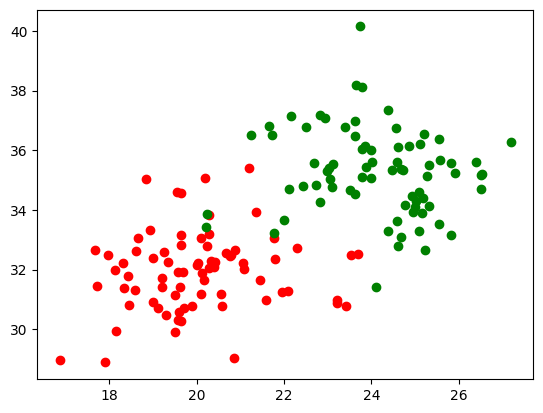

In [46]:
import matplotlib.pyplot as plt

pic = df[df['Pichu_pikachu'] == 0] # delar träningsdatan utifrån pichu och pikachu punkter
pika = df[df['Pichu_pikachu'] == 1]

plt.scatter(pic['Width cm'], pic[' height cm'], color = "red") # anger i en graf alla pichu punkter som rött
plt.scatter(pika['Width cm'], pika[' height cm'], color = "green") # anger i en graf alla pikachu punkter som grönt
plt.show()


In [10]:
df.columns = df.columns.str.replace("(", "").str.replace(")", "").str.replace("_h", "H").str.capitalize() # rensar/ändrar namnen på kolumnen
df

,Width cm,height cm,Pichu_pikachu
0,21.959384,31.239567,0
1,23.635916,36.468215,1
2,17.714056,31.441704,0
3,21.780200,33.213398,1
4,25.206306,36.558816,1
...,...,...,...
145,18.990690,32.387963,0
146,23.542000,32.475193,0
147,19.640603,30.291557,0
148,21.989954,33.645903,1


In [11]:
test_lt=[] # skapar en ny lista för testdatan
with open("testpoints.txt") as file: #läser in testdatan och kallar det file
    test_file = file.readlines() #läser in file rad för rad
    for x in test_file:
        test_lt.append(x) # med hjälp av loopen så lägger den in filen rad för rad i test listan

test_lt

['Test points:\n',
 '1. (25, 32)\n',
 '2. (24.2, 31.5)\n',
 '3. (22, 34)\n',
 '4. (20.5, 34)\n']

In [52]:
import pandas as pd
test_data = pd.DataFrame(test_lt) # visar listan för testdatan tabulärt genom DataFrame

test_data

,0
0,Test points:\n
1,"1. (25, 32)\n"
2,"2. (24.2, 31.5)\n"
3,"3. (22, 34)\n"
4,"4. (20.5, 34)\n"


In [53]:
test_data = test_data.drop(0, axis = 0) # tar bort siffran 0 från raden

In [55]:
test_data["Width"] = test_data[0].str.split("(").str.get(1).str.split(",").str.get(0) # sorterar kolumnerna genom att dela upp siffrorna från parentesen och kommatecknen och lägger dom under Width respektive Height kolumnen
test_data["Height"] = test_data[0].str.split(")").str.get(0).str.split(",").str.get(1)
test_data

,0,Width,Height
1,"1. (25, 32)\n",25,32
2,"2. (24.2, 31.5)\n",24.2,31.5
3,"3. (22, 34)\n",22,34
4,"4. (20.5, 34)\n",20.5,34


In [56]:
test_data

,0,Width,Height
1,"1. (25, 32)\n",25,32
2,"2. (24.2, 31.5)\n",24.2,31.5
3,"3. (22, 34)\n",22,34
4,"4. (20.5, 34)\n",20.5,34


In [57]:
import numpy as np
test_data[["Width", "Height"]] = test_data[["Width", "Height"]].astype(float) # omvandlar text till decimaler
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 1 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4 non-null      object 
 1   Width   4 non-null      float64
 2   Height  4 non-null      float64
dtypes: float64(2), object(1)
memory usage: 228.0+ bytes


In [64]:
test_data = test_data.drop(0, axis = 1) # tar bort nummer 0 från raden
test_data

,Width,Height
1,25.0,32.0
2,24.2,31.5
3,22.0,34.0
4,20.5,34.0


In [14]:
df.columns # namn på kolumnerna

Index(['Width cm', ' height cm', 'Pichu_pikachu'], dtype='object')

In [70]:
#def pichu(width, height)
import numpy as np
def kon(wid, hie): # funktion för och klassifiera punkterna för och kunna se fall det är pichu eller Pikachu
   liist = [] # skapa en ny lista
   for x, y in zip(df['Width cm'], df[' height cm']): # loopar genom Width och Height med hjälp av zip för och räkna avståndet mellan inmatade data och träningsdata
      liist.append(np.sqrt(np.power(x-wid, 2)+np.power(y-hie, 2))) # beräkningen av avståndet mellan punkterna som läggs in i listan

   minsta_värde = min(liist) # minsta avstånd i listan
   rade_träning = liist.index(minsta_värde) # hittar nummer på raden
   if df.loc[rade_träning, "Pichu_pikachu"] == 1: # visar i vilken rad minsta avståndet befinner sig i
      print("pikachu")
   else: 
      print("pichu")

for x, y in zip(test_data["Width"], test_data["Height"]): # loopar genom testdatan
   kon(x, y) # funktionen för testdatan (wid, hie)

pikachu
pikachu
pikachu
pichu
